In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.rcParams['font.family']='SimHei' #正常顯示中文

df = pd.DataFrame({'BookID':['B1','B2','B3','B4','B5','B6','B7','B8','B9','B10'],'Income':[1000,3000,30000,24000,300,400,800,2300,12000,1800]})
df = df.sort_values(by=['Income'],ascending=False).reset_index(drop=True)
df

,BookID,Income
0,B3,30000
1,B4,24000
2,B9,12000
3,B2,3000
4,B8,2300
5,B10,1800
6,B1,1000
7,B7,800
8,B6,400
9,B5,300


In [2]:
# 計算收入佔總收入百分比（累積）
p = []
for i in range(len(df)):
    x = df['Income'][i]/sum(df['Income'])
    if(i!=0):
        p.append(x+p[i-1])
    else:
        p.append(x)
p

[0.3968253968253968,
 0.71428571428571419,
 0.87301587301587291,
 0.91269841269841256,
 0.94312169312169303,
 0.96693121693121686,
 0.98015873015873012,
 0.9907407407407407,
 0.99603174603174605,
 1.0]

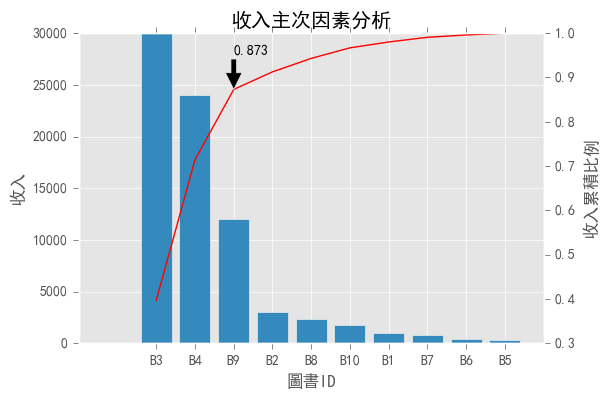

In [3]:
fig, ax1 = plt.subplots()
ax1.bar(df.index,df['Income'],align='center')
ax1.set_ylabel('收入')
ax1.set_xlabel('圖書ID')

# ax2共用ax1的x軸
ax2 = ax1.twinx()
ax2.plot(df.index, p, 'r-')
ax2.set_ylabel('收入累積比例')
ax2.grid(False)

#標註過80%的點
for i in range(len(p)):
    if(p[i]>0.8):
        ax2.annotate(round(p[i],3),xy=(df.index[i],p[i]),xytext=(df.index[i],p[i]+0.08), #xy=(箭頭指的點), xytext=(標註文字的位置)
                     arrowprops=dict(facecolor='black'))
        break

plt.xticks(df.index, df['BookID'])
plt.title('收入主次因素分析')

plt.show()